In [1]:
import ROOT

Welcome to JupyROOT 6.24/07


In [2]:
#ntoys = 500
#nstats = 5000
ntoys = 500
nstats = 5000

c0gen = 0.0
c1gen = 0.0


In [3]:
rnd = ROOT.TRandom3()

In [4]:
haccepted = ROOT.TH1F("haccepted", "Generated events;cos(#theta);#events", 40, -1.0, 1.0)
hweighted = ROOT.TH1F("hweighted", "Generated events;cos(#theta);#events, weighted", 40, -1.0, 1.0)

In [5]:
hc0pull1 = ROOT.TH1F("hc0pull1","Inverse weighted Hessian matrix [SumW2Error(false)];Pull (c_{0}^{fit}-c_{0}^{gen})/#sigma(c_{0});", 20, -5.0, 5.0)
hc1pull1 = ROOT.TH1F("hc1pull1","Inverse weighted Hessian matrix [SumW2Error(false)];Pull (c_{1}^{fit}-c_{1}^{gen})/#sigma(c_{1});", 20, -5.0, 5.0)

hc0pull2 = ROOT.TH1F("hc0pull2","Hessian matrix with squared weights [SumW2Error(true)];Pull (c_{0}^{fit}-c_{0}^{gen})/#sigma(c_{0});", 20, -5.0, 5.0)
hc1pull2 = ROOT.TH1F("hc1pull2","Hessian matrix with squared weights [SumW2Error(true)];Pull (c_{1}^{fit}-c_{1}^{gen})/#sigma(c_{1});", 20, -5.0, 5.0)

hc0pull3 = ROOT.TH1F("hc0pull3","Asymptotically correct approach [Asymptotic(true)];Pull (c_{0}^{fit}-c_{0}^{gen})/#sigma(c_{0});", 20, -5.0, 5.0)
hc1pull3 = ROOT.TH1F("hc1pull3","Asymptotically correct approach [Asymptotic(true)];Pull (c_{1}^{fit}-c_{1}^{gen})/#sigma(c_{1});", 20, -5.0, 5.0)


In [6]:
ROOT.RooMsgService.instance().Print()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

Active Message streams
[0] MinLevel = PROGRESS Topic = Generation Minization Plotting Fitting Integration LinkStateMgmt Eval Caching Optimization ObjectHandling InputArguments Tracing Contents DataHandling NumericIntegration FastEvaluations 
[1] MinLevel = INFO Topic = Minization Plotting Fitting Eval Caching ObjectHandling InputArguments DataHandling NumericIntegration 
[2] MinLevel = INFO Topic = HistFactory 


In [7]:
ROOT.RooMsgService.instance().getStream(1).removeTopic(ROOT.RooFit.Minimization)
ROOT.RooMsgService.instance().getStream(1).removeTopic(ROOT.RooFit.Fitting)

In [8]:
for i in range(ntoys) :
    
    print(" --- toy %4d" % i)
    
    costheta = ROOT.RooRealVar("costheta","costheta", -1.0, 1.0)
    weight = ROOT.RooRealVar("weight","weight", 0.0, 1000.0)
    
    c0 = ROOT.RooRealVar("c0","0th-order coefficient", c0gen, -1.0, 1.0);
    c1 = ROOT.RooRealVar("c1","1st-order coefficient", c1gen, -1.0, 1.0);
    
    c0.setError(0.01)
    c1.setError(0.01)
    
    pol = ROOT.RooPolynomial("pol", "pol", costheta, ROOT.RooArgList(c0, c1), 1)
    
    data = ROOT.RooDataSet("data","data",ROOT.RooArgSet(costheta, weight), ROOT.RooFit.WeightVar("weight"))
    
    for j in range(nstats) :
        
        finished = False
        
        while not finished :
            
            costheta.setVal( 2.0*rnd.Rndm()-1.0 ) 
            
            eff = 1.0
            
            eff = 0.3 + 0.7 * costheta.getVal()*costheta.getVal()
            
            weight.setVal( 1.0/eff )
            
            if (10.0*rnd.Rndm() < eff*pol.getVal()) :
                finished = True
        #print( "costheta = %.3f  weight = %.3f" % (costheta.getVal(), weight.getVal()))       
        
        haccepted.Fill( costheta.getVal() )
        hweighted.Fill( costheta.getVal(), weight.getVal() )
        data.add(ROOT.RooArgSet(costheta, weight), weight.getVal())
        
    result = pol.fitTo(data, 
                       ROOT.RooFit.Save(True), 
                       ROOT.RooFit.SumW2Error(False), 
                       ROOT.RooFit.PrintLevel(-1), 
                       ROOT.RooFit.BatchMode(True))
    
    print( "  %4d : Inverse Weighted Hessian matrix : c0 = %8.3f +/- %8.3f" % (i, c0.getVal(), c0.getError()))
    print( "  %4d : Inverse Weighted Hessian matrix : c1 = %8.3f +/- %8.3f" % (i, c1.getVal(), c1.getError()))
    
    hc0pull1.Fill( (c0.getVal()-c0gen)/c0.getError() )
    hc1pull1.Fill( (c1.getVal()-c1gen)/c1.getError() )

    result = pol.fitTo(data, 
                       ROOT.RooFit.Save(True), 
                       ROOT.RooFit.SumW2Error(True), 
                       ROOT.RooFit.PrintLevel(-1), 
                       ROOT.RooFit.BatchMode(True))
 

    print( "  %4d : Inverse Weighted Hessian matrix, w2 : c0 = %8.3f +/- %8.3f" % (i, c0.getVal(), c0.getError()))
    print( "  %4d : Inverse Weighted Hessian matrix, w2 : c1 = %8.3f +/- %8.3f" % (i, c1.getVal(), c1.getError()))

    hc0pull2.Fill( (c0.getVal()-c0gen)/c0.getError() )
    hc1pull2.Fill( (c1.getVal()-c1gen)/c1.getError() )


    
    result = pol.fitTo(data, 
                       ROOT.RooFit.Save(True), 
                       ROOT.RooFit.AsymptoticError(True), 
                       ROOT.RooFit.PrintLevel(-1), 
                       ROOT.RooFit.BatchMode(True))
 

    print( "  %4d : Asymptotic : c0 = %8.3f +/- %8.3f" % (i, c0.getVal(), c0.getError()))
    print( "  %4d : Asymptotic : c1 = %8.3f +/- %8.3f" % (i, c1.getVal(), c1.getError()))

    hc0pull3.Fill( (c0.getVal()-c0gen)/c0.getError() )
    hc1pull3.Fill( (c1.getVal()-c1gen)/c1.getError() )

    

 --- toy    0
     0 : Inverse Weighted Hessian matrix : c0 =    0.034 +/-    0.017
     0 : Inverse Weighted Hessian matrix : c1 =   -0.105 +/-    0.031
     0 : Inverse Weighted Hessian matrix, w2 : c0 =    0.034 +/-    0.021
     0 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.105 +/-    0.023
     0 : Asymptotic : c0 =    0.034 +/-    0.021
     0 : Asymptotic : c1 =   -0.105 +/-    0.043
 --- toy    1
     1 : Inverse Weighted Hessian matrix : c0 =   -0.019 +/-    0.018
     1 : Inverse Weighted Hessian matrix : c1 =   -0.028 +/-    0.034
     1 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.019 +/-    0.022
     1 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.028 +/-    0.019
     1 : Asymptotic : c0 =   -0.019 +/-    0.022
     1 : Asymptotic : c1 =   -0.028 +/-    0.046
 --- toy    2
     2 : Inverse Weighted Hessian matrix : c0 =   -0.014 +/-    0.018
     2 : Inverse Weighted Hessian matrix : c1 =   -0.025 +/-    0.034
     2 : Inverse Weighted Hessian matrix, w2 :

    21 : Inverse Weighted Hessian matrix : c0 =    0.018 +/-    0.018
    21 : Inverse Weighted Hessian matrix : c1 =    0.016 +/-    0.035
    21 : Inverse Weighted Hessian matrix, w2 : c0 =    0.018 +/-    0.022
    21 : Inverse Weighted Hessian matrix, w2 : c1 =    0.016 +/-    0.015
    21 : Asymptotic : c0 =    0.018 +/-    0.022
    21 : Asymptotic : c1 =    0.016 +/-    0.048
 --- toy   22
    22 : Inverse Weighted Hessian matrix : c0 =    0.030 +/-    0.017
    22 : Inverse Weighted Hessian matrix : c1 =   -0.110 +/-    0.031
    22 : Inverse Weighted Hessian matrix, w2 : c0 =    0.030 +/-    0.021
    22 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.110 +/-    0.023
    22 : Asymptotic : c0 =    0.030 +/-    0.021
    22 : Asymptotic : c1 =   -0.110 +/-    0.043
 --- toy   23
    23 : Inverse Weighted Hessian matrix : c0 =    0.027 +/-    0.018
    23 : Inverse Weighted Hessian matrix : c1 =   -0.007 +/-    0.034
    23 : Inverse Weighted Hessian matrix, w2 : c0 =    0.027

    42 : Inverse Weighted Hessian matrix : c0 =    0.002 +/-    0.018
    42 : Inverse Weighted Hessian matrix : c1 =   -0.018 +/-    0.034
    42 : Inverse Weighted Hessian matrix, w2 : c0 =    0.002 +/-    0.022
    42 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.018 +/-    0.018
    42 : Asymptotic : c0 =    0.002 +/-    0.022
    42 : Asymptotic : c1 =   -0.018 +/-    0.046
 --- toy   43
    43 : Inverse Weighted Hessian matrix : c0 =   -0.008 +/-    0.017
    43 : Inverse Weighted Hessian matrix : c1 =   -0.049 +/-    0.033
    43 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.008 +/-    0.021
    43 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.049 +/-    0.020
    43 : Asymptotic : c0 =   -0.008 +/-    0.021
    43 : Asymptotic : c1 =   -0.049 +/-    0.045
 --- toy   44
    44 : Inverse Weighted Hessian matrix : c0 =    0.039 +/-    0.018
    44 : Inverse Weighted Hessian matrix : c1 =    0.011 +/-    0.035
    44 : Inverse Weighted Hessian matrix, w2 : c0 =    0.039

    63 : Inverse Weighted Hessian matrix : c0 =    0.038 +/-    0.018
    63 : Inverse Weighted Hessian matrix : c1 =   -0.006 +/-    0.035
    63 : Inverse Weighted Hessian matrix, w2 : c0 =    0.038 +/-    0.022
    63 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.006 +/-    0.017
    63 : Asymptotic : c0 =    0.038 +/-    0.022
    63 : Asymptotic : c1 =   -0.006 +/-    0.047
 --- toy   64
    64 : Inverse Weighted Hessian matrix : c0 =    0.011 +/-    0.018
    64 : Inverse Weighted Hessian matrix : c1 =   -0.009 +/-    0.034
    64 : Inverse Weighted Hessian matrix, w2 : c0 =    0.011 +/-    0.022
    64 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.009 +/-    0.018
    64 : Asymptotic : c0 =    0.011 +/-    0.022
    64 : Asymptotic : c1 =   -0.009 +/-    0.047
 --- toy   65
    65 : Inverse Weighted Hessian matrix : c0 =   -0.026 +/-    0.017
    65 : Inverse Weighted Hessian matrix : c1 =   -0.068 +/-    0.032
    65 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.025

    84 : Inverse Weighted Hessian matrix : c0 =   -0.007 +/-    0.019
    84 : Inverse Weighted Hessian matrix : c1 =    0.076 +/-    0.037
    84 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.007 +/-    0.023
    84 : Inverse Weighted Hessian matrix, w2 : c1 =    0.076 +/-    0.007
    84 : Asymptotic : c0 =   -0.007 +/-    0.023
    84 : Asymptotic : c1 =    0.076 +/-    0.051
 --- toy   85
    85 : Inverse Weighted Hessian matrix : c0 =   -0.035 +/-    0.018
    85 : Inverse Weighted Hessian matrix : c1 =    0.049 +/-    0.036
    85 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.035 +/-    0.023
    85 : Inverse Weighted Hessian matrix, w2 : c1 =    0.049 +/-    0.011
    85 : Asymptotic : c0 =   -0.035 +/-    0.023
    85 : Asymptotic : c1 =    0.049 +/-    0.050
 --- toy   86
    86 : Inverse Weighted Hessian matrix : c0 =    0.020 +/-    0.018
    86 : Inverse Weighted Hessian matrix : c1 =    0.060 +/-    0.036
    86 : Inverse Weighted Hessian matrix, w2 : c0 =    0.020

   105 : Inverse Weighted Hessian matrix : c0 =    0.045 +/-    0.019
   105 : Inverse Weighted Hessian matrix : c1 =    0.064 +/-    0.037
   105 : Inverse Weighted Hessian matrix, w2 : c0 =    0.045 +/-    0.023
   105 : Inverse Weighted Hessian matrix, w2 : c1 =    0.064 +/-    0.007
   105 : Asymptotic : c0 =    0.045 +/-    0.023
   105 : Asymptotic : c1 =    0.064 +/-    0.050
 --- toy  106
   106 : Inverse Weighted Hessian matrix : c0 =   -0.010 +/-    0.018
   106 : Inverse Weighted Hessian matrix : c1 =   -0.011 +/-    0.034
   106 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.010 +/-    0.022
   106 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.011 +/-    0.018
   106 : Asymptotic : c0 =   -0.010 +/-    0.022
   106 : Asymptotic : c1 =   -0.011 +/-    0.047
 --- toy  107
   107 : Inverse Weighted Hessian matrix : c0 =    0.000 +/-    0.017
   107 : Inverse Weighted Hessian matrix : c1 =   -0.080 +/-    0.032
   107 : Inverse Weighted Hessian matrix, w2 : c0 =    0.000

   126 : Inverse Weighted Hessian matrix : c0 =    0.005 +/-    0.018
   126 : Inverse Weighted Hessian matrix : c1 =    0.028 +/-    0.035
   126 : Inverse Weighted Hessian matrix, w2 : c0 =    0.005 +/-    0.022
   126 : Inverse Weighted Hessian matrix, w2 : c1 =    0.028 +/-    0.014
   126 : Asymptotic : c0 =    0.005 +/-    0.022
   126 : Asymptotic : c1 =    0.028 +/-    0.049
 --- toy  127
   127 : Inverse Weighted Hessian matrix : c0 =    0.032 +/-    0.018
   127 : Inverse Weighted Hessian matrix : c1 =    0.050 +/-    0.036
   127 : Inverse Weighted Hessian matrix, w2 : c0 =    0.032 +/-    0.023
   127 : Inverse Weighted Hessian matrix, w2 : c1 =    0.050 +/-    0.010
   127 : Asymptotic : c0 =    0.032 +/-    0.023
   127 : Asymptotic : c1 =    0.050 +/-    0.050
 --- toy  128
   128 : Inverse Weighted Hessian matrix : c0 =    0.014 +/-    0.018
   128 : Inverse Weighted Hessian matrix : c1 =    0.042 +/-    0.036
   128 : Inverse Weighted Hessian matrix, w2 : c0 =    0.014

   147 : Inverse Weighted Hessian matrix : c0 =    0.009 +/-    0.017
   147 : Inverse Weighted Hessian matrix : c1 =   -0.070 +/-    0.033
   147 : Inverse Weighted Hessian matrix, w2 : c0 =    0.009 +/-    0.021
   147 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.070 +/-    0.022
   147 : Asymptotic : c0 =    0.009 +/-    0.021
   147 : Asymptotic : c1 =   -0.070 +/-    0.045
 --- toy  148
   148 : Inverse Weighted Hessian matrix : c0 =    0.010 +/-    0.018
   148 : Inverse Weighted Hessian matrix : c1 =    0.043 +/-    0.036
   148 : Inverse Weighted Hessian matrix, w2 : c0 =    0.010 +/-    0.023
   148 : Inverse Weighted Hessian matrix, w2 : c1 =    0.043 +/-    0.012
   148 : Asymptotic : c0 =    0.010 +/-    0.023
   148 : Asymptotic : c1 =    0.043 +/-    0.050
 --- toy  149
   149 : Inverse Weighted Hessian matrix : c0 =   -0.030 +/-    0.017
   149 : Inverse Weighted Hessian matrix : c1 =   -0.044 +/-    0.033
   149 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.030

   168 : Inverse Weighted Hessian matrix : c0 =    0.043 +/-    0.018
   168 : Inverse Weighted Hessian matrix : c1 =   -0.029 +/-    0.034
   168 : Inverse Weighted Hessian matrix, w2 : c0 =    0.043 +/-    0.022
   168 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.029 +/-    0.019
   168 : Asymptotic : c0 =    0.043 +/-    0.022
   168 : Asymptotic : c1 =   -0.029 +/-    0.046
 --- toy  169
   169 : Inverse Weighted Hessian matrix : c0 =   -0.007 +/-    0.018
   169 : Inverse Weighted Hessian matrix : c1 =   -0.010 +/-    0.035
   169 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.007 +/-    0.022
   169 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.010 +/-    0.018
   169 : Asymptotic : c0 =   -0.007 +/-    0.022
   169 : Asymptotic : c1 =   -0.010 +/-    0.047
 --- toy  170
   170 : Inverse Weighted Hessian matrix : c0 =   -0.006 +/-    0.018
   170 : Inverse Weighted Hessian matrix : c1 =    0.017 +/-    0.035
   170 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.006

   189 : Inverse Weighted Hessian matrix : c0 =   -0.005 +/-    0.019
   189 : Inverse Weighted Hessian matrix : c1 =    0.086 +/-    0.037
   189 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.005 +/-    0.023
   189 : Inverse Weighted Hessian matrix, w2 : c1 =    0.086 +/-    0.001
   189 : Asymptotic : c0 =   -0.005 +/-    0.023
   189 : Asymptotic : c1 =    0.086 +/-    0.052
 --- toy  190
   190 : Inverse Weighted Hessian matrix : c0 =   -0.014 +/-    0.018
   190 : Inverse Weighted Hessian matrix : c1 =   -0.020 +/-    0.034
   190 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.014 +/-    0.022
   190 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.020 +/-    0.019
   190 : Asymptotic : c0 =   -0.014 +/-    0.022
   190 : Asymptotic : c1 =   -0.020 +/-    0.047
 --- toy  191
   191 : Inverse Weighted Hessian matrix : c0 =   -0.014 +/-    0.018
   191 : Inverse Weighted Hessian matrix : c1 =   -0.040 +/-    0.034
   191 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.014

   210 : Inverse Weighted Hessian matrix : c0 =    0.019 +/-    0.018
   210 : Inverse Weighted Hessian matrix : c1 =    0.007 +/-    0.035
   210 : Inverse Weighted Hessian matrix, w2 : c0 =    0.019 +/-    0.022
   210 : Inverse Weighted Hessian matrix, w2 : c1 =    0.007 +/-    0.016
   210 : Asymptotic : c0 =    0.019 +/-    0.022
   210 : Asymptotic : c1 =    0.007 +/-    0.048
 --- toy  211
   211 : Inverse Weighted Hessian matrix : c0 =    0.016 +/-    0.018
   211 : Inverse Weighted Hessian matrix : c1 =   -0.020 +/-    0.034
   211 : Inverse Weighted Hessian matrix, w2 : c0 =    0.016 +/-    0.022
   211 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.020 +/-    0.018
   211 : Asymptotic : c0 =    0.016 +/-    0.022
   211 : Asymptotic : c1 =   -0.020 +/-    0.046
 --- toy  212
   212 : Inverse Weighted Hessian matrix : c0 =   -0.015 +/-    0.019
   212 : Inverse Weighted Hessian matrix : c1 =    0.072 +/-    0.037
   212 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.015

   231 : Inverse Weighted Hessian matrix : c0 =    0.022 +/-    0.017
   231 : Inverse Weighted Hessian matrix : c1 =   -0.060 +/-    0.033
   231 : Inverse Weighted Hessian matrix, w2 : c0 =    0.022 +/-    0.021
   231 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.060 +/-    0.021
   231 : Asymptotic : c0 =    0.022 +/-    0.021
   231 : Asymptotic : c1 =   -0.060 +/-    0.045
 --- toy  232
   232 : Inverse Weighted Hessian matrix : c0 =   -0.001 +/-    0.018
   232 : Inverse Weighted Hessian matrix : c1 =   -0.005 +/-    0.034
   232 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.002 +/-    0.022
   232 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.005 +/-    0.017
   232 : Asymptotic : c0 =   -0.002 +/-    0.022
   232 : Asymptotic : c1 =   -0.005 +/-    0.047
 --- toy  233
   233 : Inverse Weighted Hessian matrix : c0 =   -0.058 +/-    0.018
   233 : Inverse Weighted Hessian matrix : c1 =    0.029 +/-    0.036
   233 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.058

   252 : Inverse Weighted Hessian matrix : c0 =    0.002 +/-    0.018
   252 : Inverse Weighted Hessian matrix : c1 =   -0.025 +/-    0.034
   252 : Inverse Weighted Hessian matrix, w2 : c0 =    0.002 +/-    0.022
   252 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.025 +/-    0.019
   252 : Asymptotic : c0 =    0.002 +/-    0.022
   252 : Asymptotic : c1 =   -0.025 +/-    0.046
 --- toy  253
   253 : Inverse Weighted Hessian matrix : c0 =   -0.035 +/-    0.018
   253 : Inverse Weighted Hessian matrix : c1 =   -0.006 +/-    0.035
   253 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.035 +/-    0.022
   253 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.006 +/-    0.017
   253 : Asymptotic : c0 =   -0.035 +/-    0.022
   253 : Asymptotic : c1 =   -0.006 +/-    0.047
 --- toy  254
   254 : Inverse Weighted Hessian matrix : c0 =    0.007 +/-    0.017
   254 : Inverse Weighted Hessian matrix : c1 =   -0.047 +/-    0.034
   254 : Inverse Weighted Hessian matrix, w2 : c0 =    0.007

   273 : Inverse Weighted Hessian matrix : c0 =   -0.023 +/-    0.018
   273 : Inverse Weighted Hessian matrix : c1 =    0.044 +/-    0.036
   273 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.023 +/-    0.023
   273 : Inverse Weighted Hessian matrix, w2 : c1 =    0.044 +/-    0.011
   273 : Asymptotic : c0 =   -0.023 +/-    0.023
   273 : Asymptotic : c1 =    0.044 +/-    0.049
 --- toy  274
   274 : Inverse Weighted Hessian matrix : c0 =    0.030 +/-    0.018
   274 : Inverse Weighted Hessian matrix : c1 =    0.036 +/-    0.036
   274 : Inverse Weighted Hessian matrix, w2 : c0 =    0.030 +/-    0.022
   274 : Inverse Weighted Hessian matrix, w2 : c1 =    0.036 +/-    0.013
   274 : Asymptotic : c0 =    0.030 +/-    0.022
   274 : Asymptotic : c1 =    0.036 +/-    0.049
 --- toy  275
   275 : Inverse Weighted Hessian matrix : c0 =    0.017 +/-    0.018
   275 : Inverse Weighted Hessian matrix : c1 =   -0.015 +/-    0.034
   275 : Inverse Weighted Hessian matrix, w2 : c0 =    0.017

   294 : Inverse Weighted Hessian matrix : c0 =   -0.063 +/-    0.018
   294 : Inverse Weighted Hessian matrix : c1 =    0.002 +/-    0.035
   294 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.063 +/-    0.022
   294 : Inverse Weighted Hessian matrix, w2 : c1 =    0.002 +/-    0.017
   294 : Asymptotic : c0 =   -0.063 +/-    0.022
   294 : Asymptotic : c1 =    0.002 +/-    0.047
 --- toy  295
   295 : Inverse Weighted Hessian matrix : c0 =    0.008 +/-    0.018
   295 : Inverse Weighted Hessian matrix : c1 =    0.013 +/-    0.035
   295 : Inverse Weighted Hessian matrix, w2 : c0 =    0.008 +/-    0.022
   295 : Inverse Weighted Hessian matrix, w2 : c1 =    0.013 +/-    0.016
   295 : Asymptotic : c0 =    0.008 +/-    0.022
   295 : Asymptotic : c1 =    0.013 +/-    0.048
 --- toy  296
   296 : Inverse Weighted Hessian matrix : c0 =    0.032 +/-    0.019
   296 : Inverse Weighted Hessian matrix : c1 =    0.108 +/-    0.038
   296 : Inverse Weighted Hessian matrix, w2 : c0 =    0.032

   315 : Inverse Weighted Hessian matrix : c0 =   -0.005 +/-    0.018
   315 : Inverse Weighted Hessian matrix : c1 =    0.047 +/-    0.036
   315 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.005 +/-    0.023
   315 : Inverse Weighted Hessian matrix, w2 : c1 =    0.047 +/-    0.011
   315 : Asymptotic : c0 =   -0.005 +/-    0.023
   315 : Asymptotic : c1 =    0.047 +/-    0.049
 --- toy  316
   316 : Inverse Weighted Hessian matrix : c0 =    0.023 +/-    0.018
   316 : Inverse Weighted Hessian matrix : c1 =   -0.037 +/-    0.033
   316 : Inverse Weighted Hessian matrix, w2 : c0 =    0.023 +/-    0.021
   316 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.037 +/-    0.019
   316 : Asymptotic : c0 =    0.023 +/-    0.021
   316 : Asymptotic : c1 =   -0.037 +/-    0.045
 --- toy  317
   317 : Inverse Weighted Hessian matrix : c0 =   -0.015 +/-    0.018
   317 : Inverse Weighted Hessian matrix : c1 =    0.037 +/-    0.036
   317 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.015

   336 : Inverse Weighted Hessian matrix : c0 =   -0.047 +/-    0.018
   336 : Inverse Weighted Hessian matrix : c1 =    0.037 +/-    0.036
   336 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.047 +/-    0.022
   336 : Inverse Weighted Hessian matrix, w2 : c1 =    0.037 +/-    0.013
   336 : Asymptotic : c0 =   -0.047 +/-    0.022
   336 : Asymptotic : c1 =    0.037 +/-    0.049
 --- toy  337
   337 : Inverse Weighted Hessian matrix : c0 =    0.016 +/-    0.018
   337 : Inverse Weighted Hessian matrix : c1 =   -0.017 +/-    0.034
   337 : Inverse Weighted Hessian matrix, w2 : c0 =    0.016 +/-    0.022
   337 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.017 +/-    0.018
   337 : Asymptotic : c0 =    0.016 +/-    0.022
   337 : Asymptotic : c1 =   -0.017 +/-    0.047
 --- toy  338
   338 : Inverse Weighted Hessian matrix : c0 =    0.001 +/-    0.018
   338 : Inverse Weighted Hessian matrix : c1 =   -0.010 +/-    0.034
   338 : Inverse Weighted Hessian matrix, w2 : c0 =    0.001

   357 : Inverse Weighted Hessian matrix : c0 =   -0.050 +/-    0.019
   357 : Inverse Weighted Hessian matrix : c1 =    0.070 +/-    0.037
   357 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.050 +/-    0.023
   357 : Inverse Weighted Hessian matrix, w2 : c1 =    0.070 +/-    0.005
   357 : Asymptotic : c0 =   -0.050 +/-    0.023
   357 : Asymptotic : c1 =    0.070 +/-    0.051
 --- toy  358
   358 : Inverse Weighted Hessian matrix : c0 =    0.003 +/-    0.017
   358 : Inverse Weighted Hessian matrix : c1 =   -0.099 +/-    0.032
   358 : Inverse Weighted Hessian matrix, w2 : c0 =    0.003 +/-    0.021
   358 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.099 +/-    0.023
   358 : Asymptotic : c0 =    0.003 +/-    0.021
   358 : Asymptotic : c1 =   -0.099 +/-    0.044
 --- toy  359
   359 : Inverse Weighted Hessian matrix : c0 =   -0.017 +/-    0.018
   359 : Inverse Weighted Hessian matrix : c1 =    0.024 +/-    0.035
   359 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.017

   378 : Inverse Weighted Hessian matrix : c0 =    0.001 +/-    0.018
   378 : Inverse Weighted Hessian matrix : c1 =   -0.009 +/-    0.034
   378 : Inverse Weighted Hessian matrix, w2 : c0 =    0.001 +/-    0.022
   378 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.009 +/-    0.018
   378 : Asymptotic : c0 =    0.001 +/-    0.022
   378 : Asymptotic : c1 =   -0.009 +/-    0.047
 --- toy  379
   379 : Inverse Weighted Hessian matrix : c0 =    0.005 +/-    0.017
   379 : Inverse Weighted Hessian matrix : c1 =   -0.099 +/-    0.031
   379 : Inverse Weighted Hessian matrix, w2 : c0 =    0.005 +/-    0.021
   379 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.099 +/-    0.022
   379 : Asymptotic : c0 =    0.005 +/-    0.021
   379 : Asymptotic : c1 =   -0.099 +/-    0.043
 --- toy  380
   380 : Inverse Weighted Hessian matrix : c0 =    0.007 +/-    0.018
   380 : Inverse Weighted Hessian matrix : c1 =    0.022 +/-    0.035
   380 : Inverse Weighted Hessian matrix, w2 : c0 =    0.007

   399 : Inverse Weighted Hessian matrix : c0 =    0.007 +/-    0.018
   399 : Inverse Weighted Hessian matrix : c1 =    0.018 +/-    0.035
   399 : Inverse Weighted Hessian matrix, w2 : c0 =    0.007 +/-    0.022
   399 : Inverse Weighted Hessian matrix, w2 : c1 =    0.018 +/-    0.015
   399 : Asymptotic : c0 =    0.007 +/-    0.022
   399 : Asymptotic : c1 =    0.018 +/-    0.048
 --- toy  400
   400 : Inverse Weighted Hessian matrix : c0 =   -0.016 +/-    0.018
   400 : Inverse Weighted Hessian matrix : c1 =    0.030 +/-    0.035
   400 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.016 +/-    0.022
   400 : Inverse Weighted Hessian matrix, w2 : c1 =    0.030 +/-    0.013
   400 : Asymptotic : c0 =   -0.016 +/-    0.022
   400 : Asymptotic : c1 =    0.030 +/-    0.049
 --- toy  401
   401 : Inverse Weighted Hessian matrix : c0 =    0.015 +/-    0.018
   401 : Inverse Weighted Hessian matrix : c1 =    0.003 +/-    0.034
   401 : Inverse Weighted Hessian matrix, w2 : c0 =    0.015

   420 : Inverse Weighted Hessian matrix : c0 =   -0.017 +/-    0.018
   420 : Inverse Weighted Hessian matrix : c1 =    0.013 +/-    0.035
   420 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.017 +/-    0.022
   420 : Inverse Weighted Hessian matrix, w2 : c1 =    0.013 +/-    0.016
   420 : Asymptotic : c0 =   -0.017 +/-    0.022
   420 : Asymptotic : c1 =    0.013 +/-    0.048
 --- toy  421
   421 : Inverse Weighted Hessian matrix : c0 =    0.016 +/-    0.019
   421 : Inverse Weighted Hessian matrix : c1 =    0.067 +/-    0.037
   421 : Inverse Weighted Hessian matrix, w2 : c0 =    0.016 +/-    0.023
   421 : Inverse Weighted Hessian matrix, w2 : c1 =    0.067 +/-    0.006
   421 : Asymptotic : c0 =    0.016 +/-    0.023
   421 : Asymptotic : c1 =    0.067 +/-    0.051
 --- toy  422
   422 : Inverse Weighted Hessian matrix : c0 =    0.026 +/-    0.018
   422 : Inverse Weighted Hessian matrix : c1 =    0.023 +/-    0.035
   422 : Inverse Weighted Hessian matrix, w2 : c0 =    0.026

   441 : Inverse Weighted Hessian matrix : c0 =   -0.019 +/-    0.018
   441 : Inverse Weighted Hessian matrix : c1 =   -0.041 +/-    0.033
   441 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.019 +/-    0.021
   441 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.041 +/-    0.020
   441 : Asymptotic : c0 =   -0.019 +/-    0.021
   441 : Asymptotic : c1 =   -0.041 +/-    0.046
 --- toy  442
   442 : Inverse Weighted Hessian matrix : c0 =    0.005 +/-    0.019
   442 : Inverse Weighted Hessian matrix : c1 =    0.095 +/-    0.037
   442 : Inverse Weighted Hessian matrix, w2 : c0 =    0.005 +/-    0.023
   442 : Inverse Weighted Hessian matrix, w2 : c1 =    0.095 +/-    0.001
   442 : Asymptotic : c0 =    0.005 +/-    0.023
   442 : Asymptotic : c1 =    0.095 +/-    0.052
 --- toy  443
   443 : Inverse Weighted Hessian matrix : c0 =    0.013 +/-    0.018
   443 : Inverse Weighted Hessian matrix : c1 =   -0.035 +/-    0.034
   443 : Inverse Weighted Hessian matrix, w2 : c0 =    0.013

   462 : Inverse Weighted Hessian matrix : c0 =    0.014 +/-    0.017
   462 : Inverse Weighted Hessian matrix : c1 =   -0.046 +/-    0.033
   462 : Inverse Weighted Hessian matrix, w2 : c0 =    0.014 +/-    0.021
   462 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.046 +/-    0.020
   462 : Asymptotic : c0 =    0.014 +/-    0.021
   462 : Asymptotic : c1 =   -0.046 +/-    0.046
 --- toy  463
   463 : Inverse Weighted Hessian matrix : c0 =   -0.014 +/-    0.018
   463 : Inverse Weighted Hessian matrix : c1 =    0.003 +/-    0.035
   463 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.014 +/-    0.022
   463 : Inverse Weighted Hessian matrix, w2 : c1 =    0.003 +/-    0.017
   463 : Asymptotic : c0 =   -0.014 +/-    0.022
   463 : Asymptotic : c1 =    0.003 +/-    0.048
 --- toy  464
   464 : Inverse Weighted Hessian matrix : c0 =    0.025 +/-    0.018
   464 : Inverse Weighted Hessian matrix : c1 =    0.044 +/-    0.036
   464 : Inverse Weighted Hessian matrix, w2 : c0 =    0.025

   483 : Inverse Weighted Hessian matrix : c0 =   -0.015 +/-    0.018
   483 : Inverse Weighted Hessian matrix : c1 =   -0.007 +/-    0.034
   483 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.015 +/-    0.022
   483 : Inverse Weighted Hessian matrix, w2 : c1 =   -0.007 +/-    0.017
   483 : Asymptotic : c0 =   -0.015 +/-    0.022
   483 : Asymptotic : c1 =   -0.007 +/-    0.047
 --- toy  484
   484 : Inverse Weighted Hessian matrix : c0 =    0.026 +/-    0.018
   484 : Inverse Weighted Hessian matrix : c1 =    0.049 +/-    0.036
   484 : Inverse Weighted Hessian matrix, w2 : c0 =    0.026 +/-    0.023
   484 : Inverse Weighted Hessian matrix, w2 : c1 =    0.049 +/-    0.010
   484 : Asymptotic : c0 =    0.026 +/-    0.023
   484 : Asymptotic : c1 =    0.049 +/-    0.050
 --- toy  485
   485 : Inverse Weighted Hessian matrix : c0 =   -0.007 +/-    0.018
   485 : Inverse Weighted Hessian matrix : c1 =    0.021 +/-    0.035
   485 : Inverse Weighted Hessian matrix, w2 : c0 =   -0.007

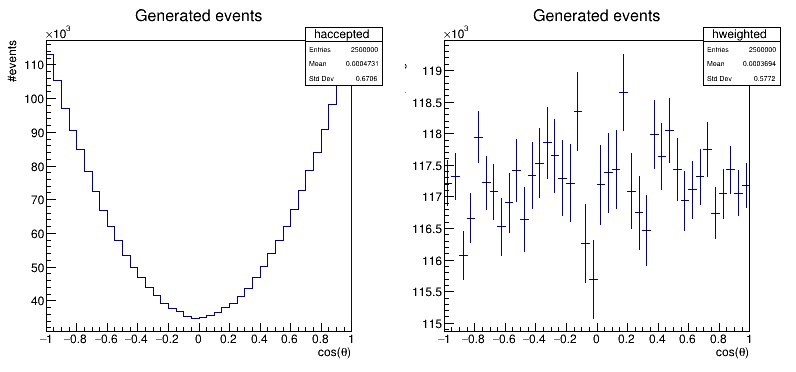

In [9]:
can1 = ROOT.TCanvas( "can1", "can1", 800, 400)
can1.Divide(2,1)
can1.cd(1)
haccepted.Draw()
can1.cd(2)
hweighted.Draw()
can1.Draw()


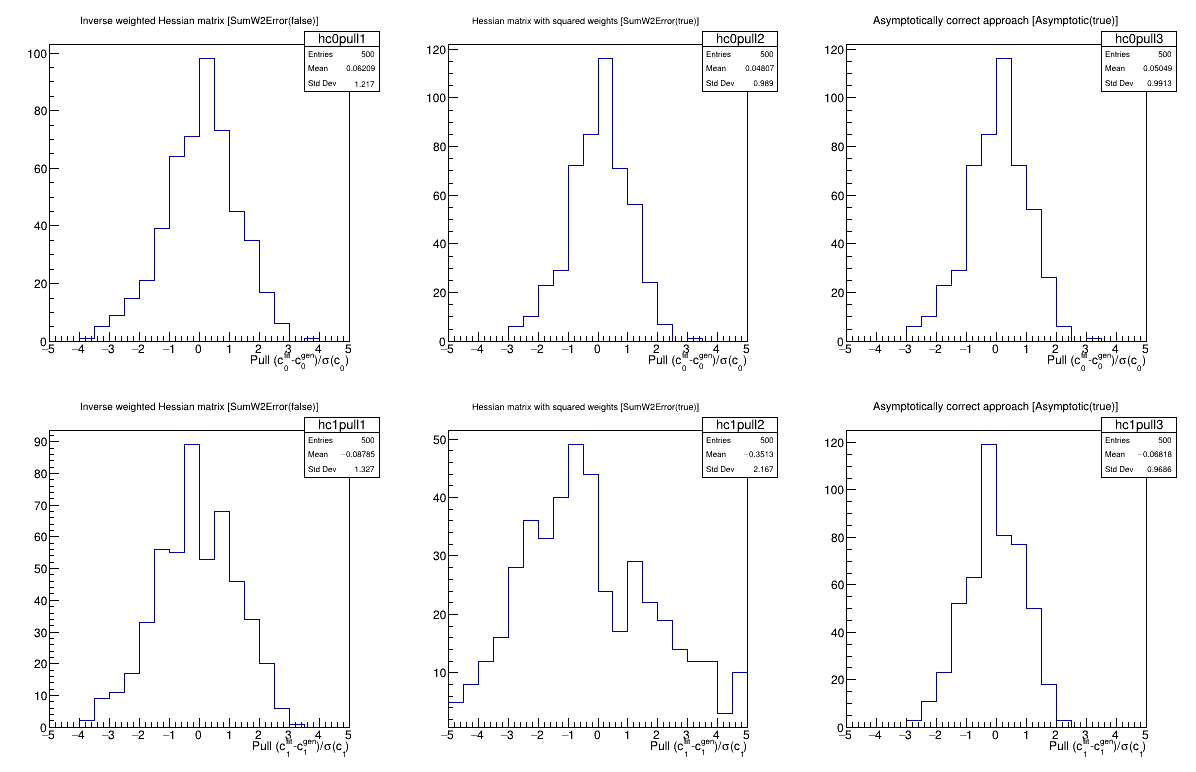

In [10]:
cpull = ROOT.TCanvas( "cpull", "cpull", 1200, 800)
cpull.Divide(3,2)
cpull.cd(1)
hc0pull1.Draw()
cpull.cd(2)
hc0pull2.Draw()
cpull.cd(3)
hc0pull3.Draw()
cpull.cd(4)
hc1pull1.Draw()
cpull.cd(5)
hc1pull2.Draw()
cpull.cd(6)
hc1pull3.Draw()
cpull.Draw()